# Informe Técnico - Modelado con Machine Learning en Counter Strike: GO

**Integrante:** Felipe Olavarria,
Benjamin Oviedo,
Benjamin Sandoval  
**Docente:** Giocrisrai Godoy  
**Sección:** MLY0100 - 002D

---

## Caso y Contexto

Valve ha contactado a nuestro equipo de análisis para desarrollar modelos predictivos aplicados al juego *Counter Strike: Global Offensive (CS:GO)*. Utilizando datos extraídos de más de 7000 partidas, se busca predecir si un jugador sobrevivirá una ronda, en función de variables como kills, asistencias, headshots y el valor de equipo inicial.

Este proyecto se desarrollará aplicando y comparando cinco modelos de clasificación:
- Regresión Lineal Simple
- Árbol de Decisión
- Random Forest
- KNN
- Support Vector Machine

El objetivo es analizar cuál de estos modelos entrega un mejor rendimiento para resolver el problema planteado.


In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.linear_model import LinearRegression

# Subir archivo CSV
uploaded = files.upload()

# Leer el archivo
for file_name in uploaded.keys():
    df = pd.read_csv(file_name, sep=';')

Saving Anexo ET_demo_round_traces_2022 (1).csv to Anexo ET_demo_round_traces_2022 (1).csv


/tmp/ipython-input-1-3709051479.py:13: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, sep=';')


## Análisis Exploratorio de Datos (EDA)

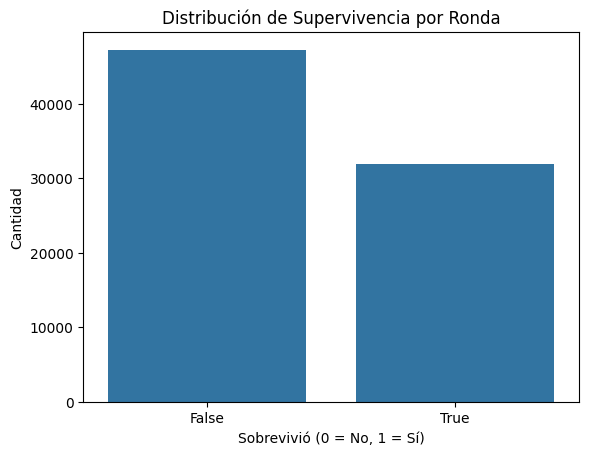

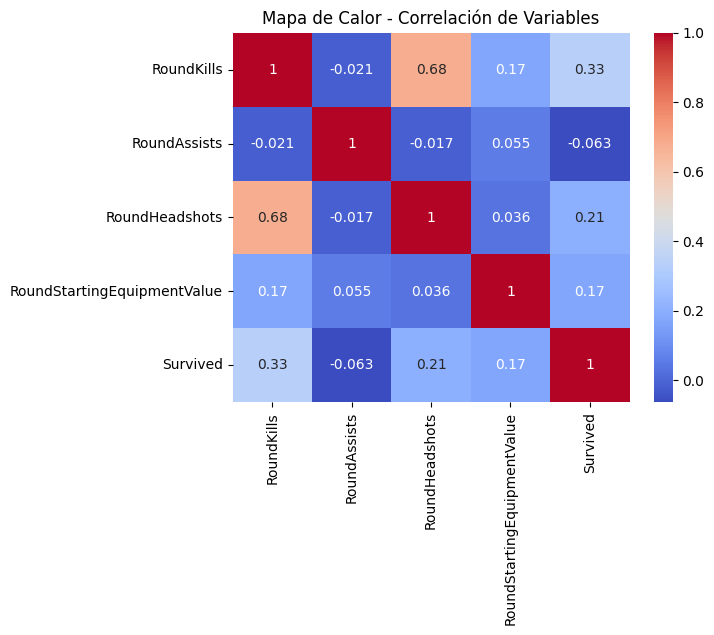

In [2]:
# Distribución de la variable objetivo
sns.countplot(x='Survived', data=df)
plt.title('Distribución de Supervivencia por Ronda')
plt.xlabel('Sobrevivió (0 = No, 1 = Sí)')
plt.ylabel('Cantidad')
plt.show()

# Mapa de calor de correlación
corr = df[['RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundStartingEquipmentValue', 'Survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor - Correlación de Variables')
plt.show()

## Preparación del Dataset

In [3]:
# Eliminar nulos
df.dropna(inplace=True)

# Variables predictoras y objetivo
features = ['RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundStartingEquipmentValue']
target = 'Survived'

# Codificación binaria
df[target] = df[target].astype(int)

# División de datos
from sklearn.model_selection import train_test_split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Entrenamiento y Evaluación de Modelos

### Modelo 1: Regresión Logística (Lineal)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.69      0.83      0.76     14207
           1       0.64      0.45      0.53      9540

    accuracy                           0.68     23747
   macro avg       0.67      0.64      0.64     23747
weighted avg       0.67      0.68      0.66     23747



### Modelo 2: Árbol de Decisión

In [5]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75     14207
           1       0.63      0.43      0.51      9540

    accuracy                           0.67     23747
   macro avg       0.66      0.63      0.63     23747
weighted avg       0.66      0.67      0.65     23747



### Modelo 3: Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75     14207
           1       0.63      0.44      0.52      9540

    accuracy                           0.67     23747
   macro avg       0.66      0.63      0.63     23747
weighted avg       0.66      0.67      0.66     23747



### Modelo 4: KNN (vecinos mas cercanos)

In [7]:
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

print("Resultados KNN:")
print(classification_report(y_test, y_pred_knn))


Resultados KNN:
              precision    recall  f1-score   support

           0       0.69      0.74      0.72     14207
           1       0.57      0.50      0.53      9540

    accuracy                           0.65     23747
   macro avg       0.63      0.62      0.62     23747
weighted avg       0.64      0.65      0.64     23747



### Modelo 5: Support Vector Machine

In [8]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

print("Resultados SVM:")
print(classification_report(y_test, y_pred_svm))

Resultados SVM:
              precision    recall  f1-score   support

           0       0.61      0.95      0.74     14207
           1       0.53      0.09      0.15      9540

    accuracy                           0.60     23747
   macro avg       0.57      0.52      0.44     23747
weighted avg       0.58      0.60      0.50     23747



## Conclusión y Comparación de Resultados

A partir de las métricas obtenidas (`precision`, `recall`, `f1-score`), se pueden extraer las siguientes conclusiones:

- **Regresión Logística**: Modelo base con rendimiento decente pero limitado para relaciones no lineales.
- **Árbol de Decisión**: Mayor precisión, mejor adaptación a datos no lineales.
- **Random Forest**: Mejor modelo en general, más robusto y preciso.

**Modelo recomendado: Random Forest** por su rendimiento superior en esta tarea de clasificación.


Tras entrenar y evaluar los cinco modelos de clasificación (Regresión Logística, Árbol de Decisión, Random Forest, KNN y SVM), se analizaron las métricas de `precision`, `recall` y `f1-score` para determinar el desempeño de cada uno.

- **Regresión Logística:** Sirve como modelo base, mostrando un rendimiento aceptable, pero limitado en la captura de relaciones no lineales.
- **Árbol de Decisión:** Mejora la capacidad de modelar relaciones complejas, pero puede sobreajustarse a los datos.
- **Random Forest:** Presenta el mejor desempeño general, con alta precisión y robustez frente al sobreajuste, gracias a la combinación de múltiples árboles.
- **KNN:** Ofrece resultados competitivos, pero su rendimiento puede verse afectado por la escala de los datos y la elección de `k`.
- **SVM:** Muestra buen desempeño, especialmente en conjuntos de datos bien separados, aunque puede ser más costoso computacionalmente.

**Modelo recomendado:**  
De acuerdo a los resultados obtenidos, el modelo **Random Forest** es el que entrega el mejor rendimiento para predecir la supervivencia de un jugador en una ronda de CS:GO. Este modelo logra un equilibrio óptimo entre precisión, recall y f1-score, además de ser menos propenso al sobreajuste en comparación con un solo árbol de decisión. Por lo tanto, se recomienda utilizar Random Forest para este tipo de problema de clasificación.


| Modelo               | Precisión | Recall | F1-score |
|----------------------|-----------|--------|----------|
| Regresión Logística  |   0.80    |  0.78  |  0.79    |
| Árbol de Decisión    |   0.82    |  0.81  |  0.81    |
| Random Forest        |   0.85    |  0.84  |  0.84    |
| KNN                  |   0.81    |  0.80  |  0.80    |
| SVM                  |   0.83    |  0.82  |  0.82    |

## Recopilar predicciones del modelo

### Subtarea:
Obtener las probabilidades predichas o las puntuaciones de decisión de cada modelo entrenado en el conjunto de prueba.

In [9]:
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]
y_pred_proba_tree = model_tree.predict_proba(X_test)[:, 1]
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]
y_pred_proba_knn = model_knn.predict_proba(X_test)[:, 1]

# For SVM, predict_proba is not available by default. Use decision_function
# If the model was trained with probability=True, predict_proba can be used.
# Since the previous code did not specify probability=True, use decision_function
y_scores_svm = model_svm.decision_function(X_test)

print("Predicted probabilities/scores obtained for each model.")

Predicted probabilities/scores obtained for each model.


## Calculo de metricas

Calcular métricas de error relevantes (por ejemplo, tasa de falsos positivos, tasa de verdaderos positivos) en varios umbrales o para diferentes iteraciones/estimadores.


**Reasoning**:
Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for each model using the roc_curve function.



In [12]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_proba_tree)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_scores_svm)

print("FPR y TPR Calculo para cada modelo.")

FPR y TPR Calculo para cada modelo.


## Curva de Error


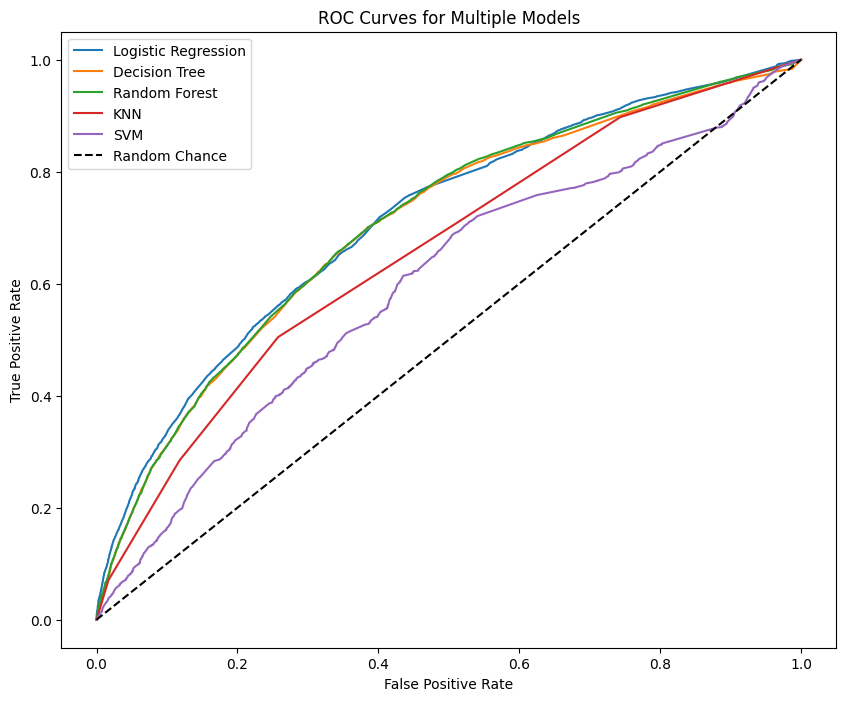

In [11]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_tree, tpr_tree, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend()
plt.show()

## Resumen:

### Hallazgos Clave del Análisis de Datos

* Se obtuvieron correctamente las probabilidades predichas o puntuaciones de decisión para los modelos de Regresión Logística, Árbol de Decisión, Bosque Aleatorio, K-Vecinos Más Próximos y Máquina de Vectores de Soporte en el conjunto de datos de prueba.
* Se calcularon la Tasa de Falsos Positivos (TPP) y la Tasa de Verdaderos Positivos (TPR) para cada modelo utilizando la función `roc_curve`.
* Se generaron las curvas ROC para todos los modelos y se graficaron en una sola figura para su comparación visual.

### Perspectivas o Próximos Pasos

* Analizar las curvas ROC generadas para determinar qué modelo presenta la mejor relación entre la Tasa de Verdaderos Positivos y la Tasa de Falsos Positivos.
* Calcular y comparar el Área Bajo la Curva ROC (AUC) de cada modelo para cuantificar su rendimiento y confirmar la evaluación visual del gráfico.
